In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
#!pip install mpld3
import mpld3
import nu
import math
import os
import re
from collections import Counter 
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/IR codes/Assignment 2'

In [ ]:
import pandas as pd
import os
def readAllFiles(FolderName,FileGroupid):
# List all files in a directory using os.listdir
  basepath = '/20_newsgroups/'+FolderName+'/'
  filepath = []
  alt = []
  fileName = []
  for entry in os.listdir(basepath):
      if os.path.isfile(os.path.join(basepath, entry)):
         filepath.append(basepath+entry)
         fileName.append(entry)
  for s in filepath:
    with open(str(s), encoding="utf8", errors='ignore') as f:
     alt.append(f.read())
  Group = []
  GroupId = []
  for item in alt:
    Group.append(FolderName)
  for item in alt:
    GroupId.append(FileGroupid)
  _pd = pd.DataFrame(alt,columns=['FileContent'])
  _pd["FileName"] = fileName
  _pd["FileGroup"] = Group
  _pd["GroupId"] = GroupId
  return _pd

**Accessing every indivial subfolder by a function and assigning an ID**

In [ ]:
lst = []#List
alt = readAllFiles("alt.atheism","1")
comp_graphics =readAllFiles("comp.graphics","2")
comp_os_ms_windows_misc = readAllFiles("comp.os.ms-windows.misc","3")
comp_sys_ibm_pc_hardware=readAllFiles('comp.sys.ibm.pc.hardware',"4")
comp_sys_mac_hardware=readAllFiles('comp.sys.mac.hardware',"5")
comp_windows_x=readAllFiles('comp.windows.x',"6")
misc_forsale=readAllFiles('misc.forsale',"7")
rec_autos=readAllFiles('rec.autos',"8")
rec_motorcycles=readAllFiles('rec.motorcycles',"9")
rec_sport_baseball=readAllFiles('rec.sport.baseball',"10")
rec_sport_hockey=readAllFiles('rec.sport.hockey',"11")
sci_crypt=readAllFiles('sci.crypt',"12")
sci_electronics=readAllFiles('sci.electronics',"13")
sci_med=readAllFiles('sci.med',"14")
sci_space=readAllFiles('sci.space',"15")
soc_religion_christian=readAllFiles('soc.religion.christian',"16")
talk_politics_guns=readAllFiles('talk.politics.guns',"17")
talk_politics_mideast=readAllFiles('talk.politics.mideast',"18")
talk_politics_misc=readAllFiles('talk.politics.misc',"19")
talk_religion_misc=readAllFiles('talk.religion.misc',"20")

**using append function to put them inside the single DataFrame**

In [ ]:
DF = alt.append(comp_graphics)
DF =  DF.append(comp_os_ms_windows_misc)
DF =  DF.append(comp_graphics)
DF =  DF.append(comp_sys_ibm_pc_hardware)
DF =  DF.append(comp_windows_x)
DF =  DF.append(misc_forsale)
DF =  DF.append(rec_autos)
DF =  DF.append(rec_motorcycles)
DF = DF.append(rec_sport_baseball)
DF = DF.append(rec_sport_hockey)
DF =  DF.append(sci_crypt)
DF = DF.append(sci_electronics)
DF = DF.append(sci_med)
DF = DF.append(sci_space)
DF = DF.append(soc_religion_christian)
DF = DF.append(talk_politics_guns)
DF = DF.append(talk_politics_mideast)
DF = DF.append(talk_politics_misc)
DF = DF.append(talk_religion_misc)

# Stemming


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

**install if needed for stopwords and punctuation removal**

In [ ]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [ ]:
from sklearn.model_selection import  train_test_split
X=DF['FileContent']
y=DF['GroupId']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(13397, 91536)


In [ ]:
vec  = tfidf_vectorizer.fit(DF['FileContent'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
vectorized_train = vec.transform(X_train)
vectorized_test = vec.transform(X_test)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist_train = 1 - cosine_similarity(tfidf_matrix)
dist_test = 1 - cosine_similarity(tfidf_matrix_test)

In [ ]:
tfidf_mat = tfidf_matrix.toarray()
# print(tfidf_matrix)
# print(dist)

# K mean for testing - K=6

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 6
km = KMeans(n_clusters = num_clusters)
km.fit(vectorized_train)

clusters = km.labels_.tolist()

In [ ]:
from sklearn.externals import joblib
# joblib.dump(km,  'KM_Train_6.pkl')
km = joblib.load('KM_Train_6.pkl')

clusters = km.labels_.tolist()

# Purity for training ( External Evaluatio)

In [ ]:
ranks = []
for i in range(0,18997):
    ranks.append(i)

In [ ]:
import pandas as pd
documents = {'alt': X_train,'cluster': clusters,'GroupID':y_train }
frame = pd.DataFrame(documents , columns = ['alt','cluster','GroupID'])

In [ ]:
print('############### Testing Data-Purity######')
print('Purity in Cluser#1: '+ str(cluster1.max()/cluster1.sum()))
print('Purity in Cluser#2: '+ str(cluster2.max()/cluster2.sum()))
print('Purity in Cluser#3: '+ str(cluster3.max()/cluster3.sum()))
print('Purity in Cluser#4: '+ str(cluster4.max()/cluster4.sum()))
print('Purity in Cluser#5: '+ str(cluster5.max()/cluster5.sum()))
print('Purity in Cluser#6: '+ str(cluster6.max()/cluster6.sum()))

############### Testing Data-Purity######
Purity in Cluser#1: 0.46226415094339623
Purity in Cluser#2: 0.2483221476510067
Purity in Cluser#3: 0.26763147166734613
Purity in Cluser#4: 0.9801526717557252
Purity in Cluser#5: 0.15519309186855362
Purity in Cluser#6: 0.9758241758241758


# prediction for testing data k=6


In [ ]:
tfidf_matrix_test = joblib.load('tfidf_matrix_test_k_6.pkl')
km_test_outpout = km.predict(vectorized_test)
km_test_outpout.labels_.tolist()

# Purity For testing (External evaluation)

In [ ]:
import pandas as pd
documents_test = {'alt': X_test,'cluster': km_test_outpout,'GroupID':y_test }
frame_test = pd.DataFrame(documents_test , columns = ['alt','cluster','GroupID'])

In [ ]:
cluster1_test = frame_test[frame_test['cluster'] == 0]["GroupID"].value_counts()
cluster2_test = frame_test[frame_test['cluster'] == 1]["GroupID"].value_counts()
cluster3_test = frame_test[frame_test['cluster'] == 2]["GroupID"].value_counts()
cluster4_test = frame_test[frame_test['cluster'] == 3]["GroupID"].value_counts()
cluster5_test = frame_test[frame_test['cluster'] == 4]["GroupID"].value_counts()
cluster6_test = frame_test[frame_test['cluster'] == 5]["GroupID"].value_counts()

In [ ]:
print('############### Testing Data-Purity######')
print('Purity in Cluser#1: '+ str(cluster1_test.max()/cluster1_test.sum()))
print('Purity in Cluser#2: '+ str(cluster2_test.max()/cluster2_test.sum()))
print('Purity in Cluser#3: '+ str(cluster3_test.max()/cluster3_test.sum()))
print('Purity in Cluser#4: '+ str(cluster4_test.max()/cluster4_test.sum()))
print('Purity in Cluser#5: '+ str(cluster5_test.max()/cluster5_test.sum()))
print('Purity in Cluser#6: '+ str(cluster6_test.max()/cluster6_test.sum()))

############### Testing Data-Purity######
Purity in Cluser#1: 0.445578231292517
Purity in Cluser#2: 0.3015323776569451
Purity in Cluser#3: 1.0
Purity in Cluser#4: 0.09507144940215806
Purity in Cluser#5: 0.5502645502645502
Purity in Cluser#6: 0.9660056657223796


# Plotting data 

In [ ]:
from sklearn.manifold import TSNE
tsne  =  TSNE(n_components=2,random_state=0)

## training data

In [ ]:
from sklearn.decomposition import  PCA
_pca = PCA(n_components=2)
pos = _pca.fit_transform(dist_train)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#F8CF45'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster#1', 
                 1: 'Cluster#2', 
                 2: 'Cluster#3', 
                 3: 'Cluster#4', 
                 4: 'Cluster#5',
                 5: 'Cluster#6'}

In [ ]:
titles = []
j = 0
for i in X_train:
  j = j + 1
  titles.append(j)

In [ ]:
color_name_test = []
i = 0
for item in y_train:
  color_name_test.append(i)
  i  = i + 1

In [ ]:
cluster_colors_test = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5: '#FCFF00',6:'#F8CF45'}

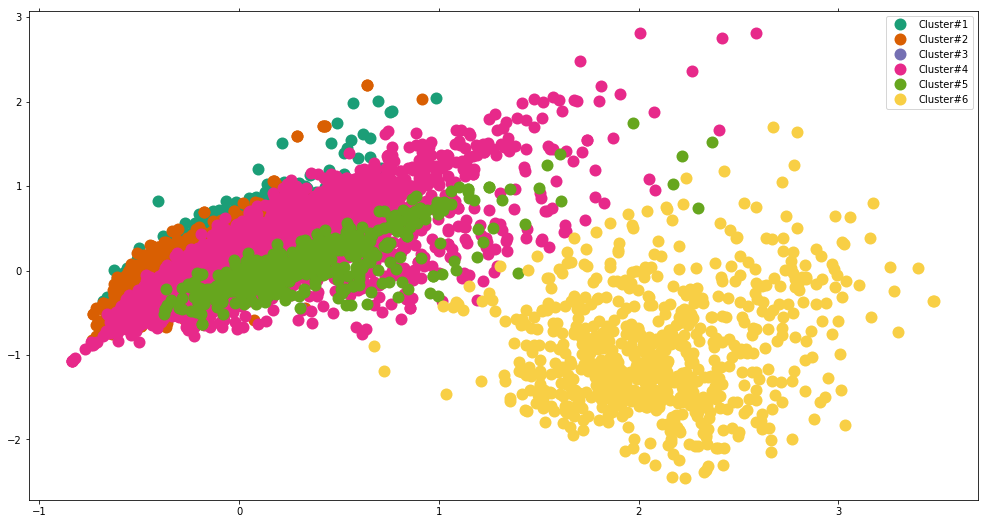

In [ ]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

plt.show() #show the plot
plt.close()
#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## testing data

In [ ]:
from sklearn.decomposition import  PCA
_pca = PCA(n_components=2)
pos_test = _pca.fit_transform(dist_test)  # shape (n_components, n_samples)
xs_test, ys_test = pos_test[:, 0], pos_test[:, 1]

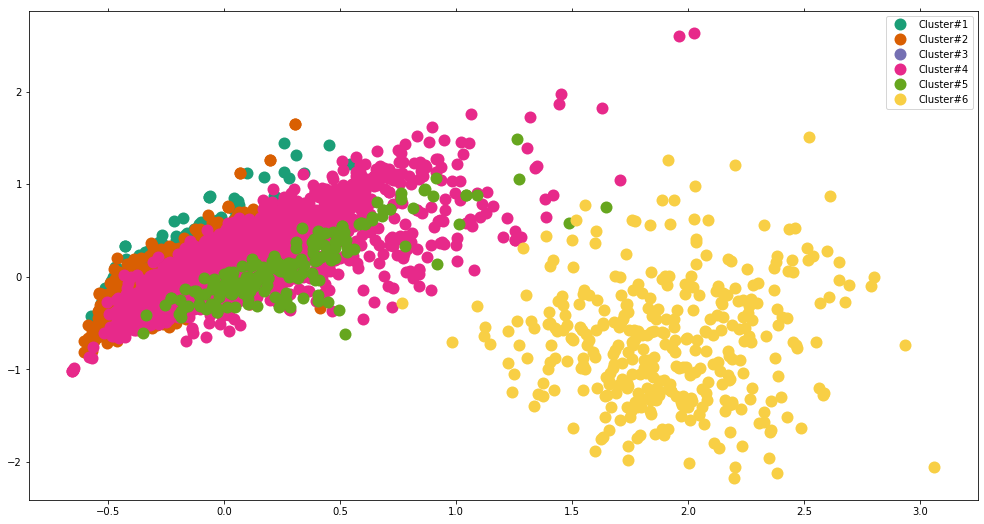

In [ ]:
df = pd.DataFrame(dict(x=xs_test, y=ys_test, label=km_test_outpout)) 
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)
plt.show() #show the plot
plt.close()


# K=3



In [ ]:
from sklearn.cluster import KMeans
num_clusters = 3
km_three = KMeans(n_clusters = num_clusters)
km_three.fit(vectorized_train)
clusters_k3 = km_three.labels_.tolist()

In [ ]:
from sklearn.externals import joblib
joblib.dump(km_three,  'KM_Train_3.pkl')

In [ ]:
import pandas as pd
documents_K_3 = {'alt': X_train,'cluster': clusters_k3,'GroupID':y_train }
frame_k_3 = pd.DataFrame(documents_K_3 , columns = ['alt','cluster','GroupID'])

In [ ]:
vectorized_test = joblib.load('vectorized_test.pkl')
vectorized_train = joblib.load('vectorized_train.pkl')

In [ ]:
km_test_outpout_K_3 = km_three.predict(vectorized_test)

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster#1', 
                 1: 'Cluster#2', 
                 2: 'Cluster#3' 
                }

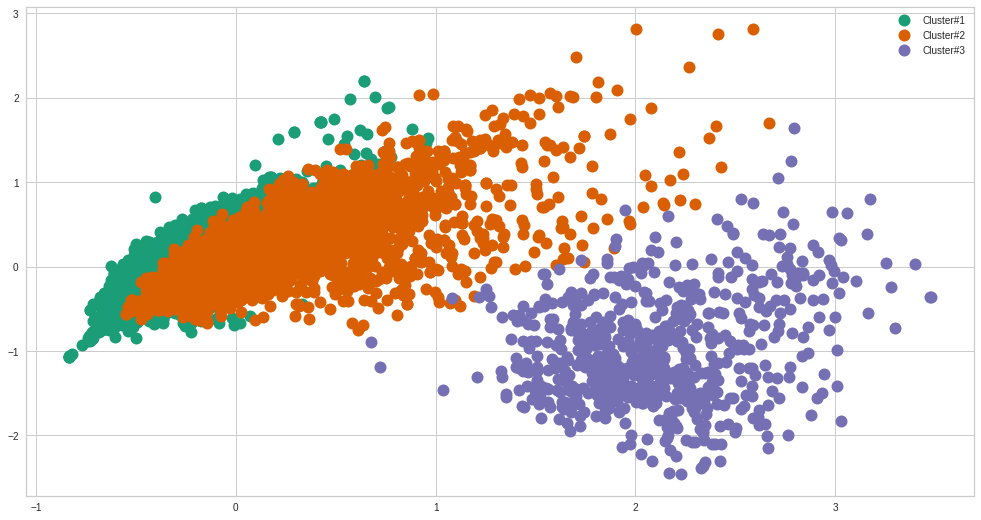

In [ ]:
import matplotlib.pyplot as plt 
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_k3)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point
#add label in x,y position with the label as the film title   
plt.show() #show the plot


# K=12

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 12
km_12 = KMeans(n_clusters = num_clusters)
km_12.fit(vectorized_train)

clusters_k12 = km_12.labels_.tolist()

In [ ]:
from sklearn.externals import joblib
joblib.dump(km_12,  'KM_Train_12.pkl')

In [ ]:
import pandas as pd
documents_K_12 = {'alt': X_train,'cluster': clusters_k12,'GroupID':y_train }
frame_k_12 = pd.DataFrame(documents_K_12 , columns = ['alt','cluster','GroupID'])

km_test_outpout_K_12 = km_12.predict(vectorized_test)

In [ ]:
from random import randint
cluster_colors = []
for i in range(20):
    cluster_colors.append('#%06X' % randint(0, 0xFFFFFF))

cluster_names = []
runner = 0
for i in range(20):
  cluster_names.append('Cluster'+ str(runner))
  runner = runner + 1

In [ ]:
cluster_names

['Cluster0',
 'Cluster1',
 'Cluster2',
 'Cluster3',
 'Cluster4',
 'Cluster5',
 'Cluster6',
 'Cluster7',
 'Cluster8',
 'Cluster9',
 'Cluster10',
 'Cluster11',
 'Cluster12',
 'Cluster13',
 'Cluster14',
 'Cluster15',
 'Cluster16',
 'Cluster17',
 'Cluster18',
 'Cluster19']

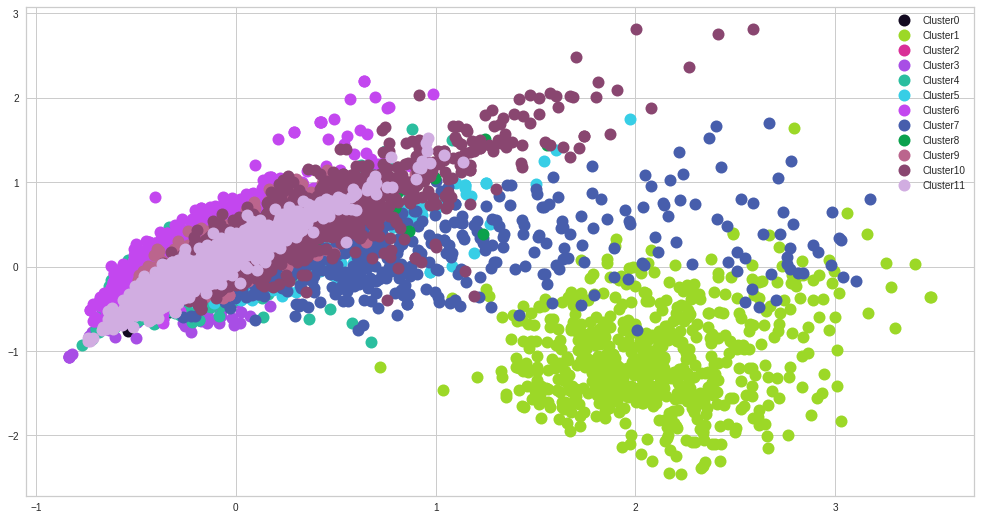

In [ ]:
import matplotlib.pyplot as plt 

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_k12)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  

plt.show() #show the plot
plt.close()

# k =20

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 20
km_20 = KMeans(n_clusters = num_clusters)
km_20.fit(vectorized_train)

clusters_k20 = km_20.labels_.tolist()

In [ ]:
from sklearn.externals import joblib
joblib.dump(km_20,  'KM_Train_20.pkl')

['KM_Train_20.pkl']

In [ ]:
import pandas as pd
documents_K_20 = {'alt': X_train,'cluster': clusters_k20,'GroupID':y_train }
frame_k_20 = pd.DataFrame(documents_K_20 , columns = ['alt','cluster','GroupID'])

km_test_outpout_K_20 = km_20.predict(vectorized_test)

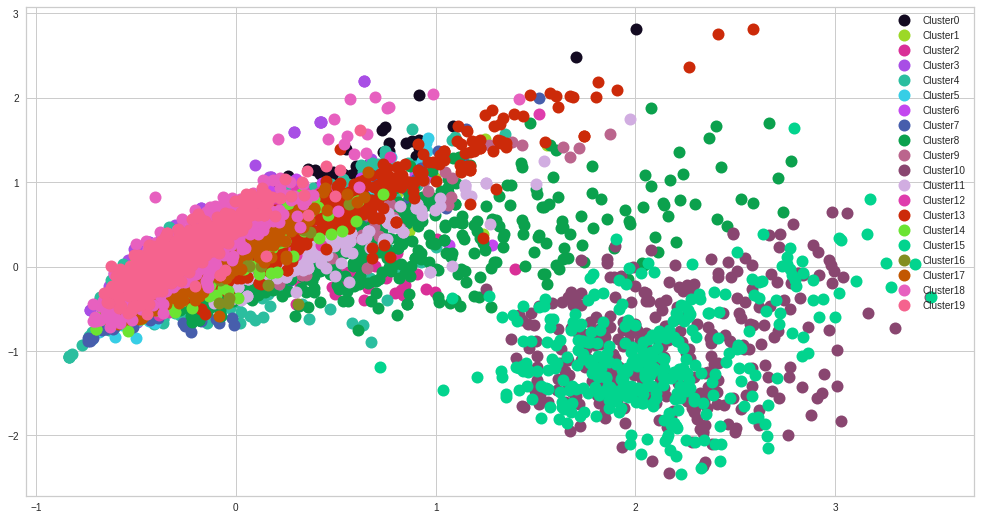

In [ ]:
import matplotlib.pyplot as plt 

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_k20)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1) 

plt.show() #show the plot
plt.close()